In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex2data2.csv'
data = pd.read_csv(data_path, header=None)
data = data.reindex(np.random.permutation(data.index))
data = np.array(data)
data.shape

(118, 3)

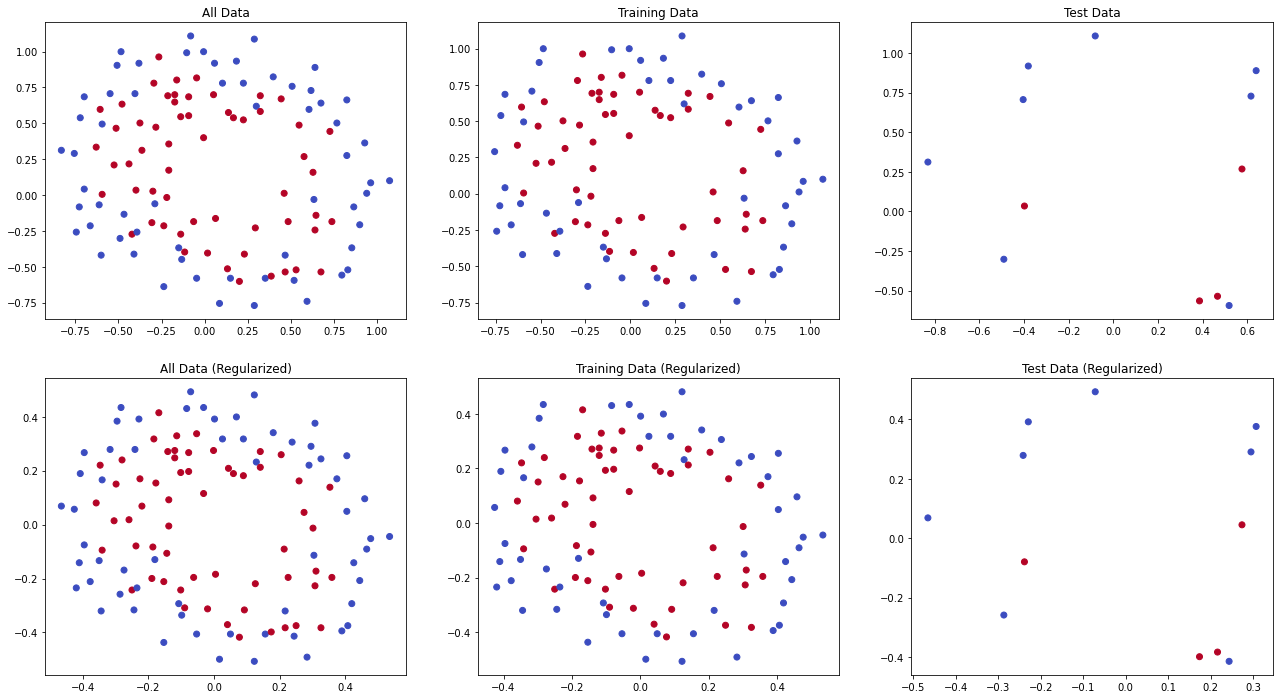

In [3]:

training_data = data[:int(data.shape[0]*0.9)].T
test_data = data[int(data.shape[0]*0.9):].T

r_data = data.T.copy()

for i in range(r_data.shape[0] - 1):
    r_data[i] = (r_data[i] - np.mean(r_data[i])) / (max(r_data[i]) - min(r_data[i]))

r_training_data = r_data.T[:int(data.shape[0]*0.9)].T
r_test_data = r_data.T[int(data.shape[0]*0.9):].T

fig = plt.figure(figsize=(22, 12))
cmap = plt.cm.coolwarm

ax = fig.add_subplot(231)
ax.set_title('All Data')
ax.scatter(training_data[0], training_data[1], c=training_data[2], cmap=cmap)
ax.scatter(test_data[0], test_data[1], c=test_data[2], cmap=cmap)

ax = fig.add_subplot(232)
ax.set_title('Training Data')
ax.scatter(training_data[0], training_data[1], c=training_data[2], cmap=cmap)

ax = fig.add_subplot(233)
ax.set_title('Test Data')
ax.scatter(test_data[0], test_data[1], c=test_data[2], cmap=cmap)

ax = fig.add_subplot(234)
ax.set_title('All Data (Regularized)')
ax.scatter(r_training_data[0], r_training_data[1], c=r_training_data[2], cmap=cmap)
ax.scatter(r_test_data[0], r_test_data[1], c=r_test_data[2], cmap=cmap)

ax = fig.add_subplot(235)
ax.set_title('Training Data (Regularized)')
ax.scatter(r_training_data[0], r_training_data[1], c=r_training_data[2], cmap=cmap)

ax = fig.add_subplot(236)
ax.set_title('Test Data (Regularized)')
ax.scatter(r_test_data[0], r_test_data[1], c=r_test_data[2], cmap=cmap);

In [4]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))
cost = lambda z, y: sum((-y * np.log(sigmoid(z)) - (1 - y) * np.log(1 - sigmoid(z))) / y.size)
gradient = lambda theta, x, y: x.T.dot((sigmoid(x.dot(theta)) - y) / y.size)

def gradient_descent(theta, x, y, tx, ty, steps, alpha):
    cost_history = np.zeros(steps)
    test_cost_history = np.zeros(steps)

    for i in range(steps):
        theta = theta - alpha * gradient(theta, x, y)
        cost_history[i] = cost(x.dot(theta), y)
        test_cost_history[i] = cost(tx.dot(theta), ty)
    
    return (theta, cost_history, test_cost_history)

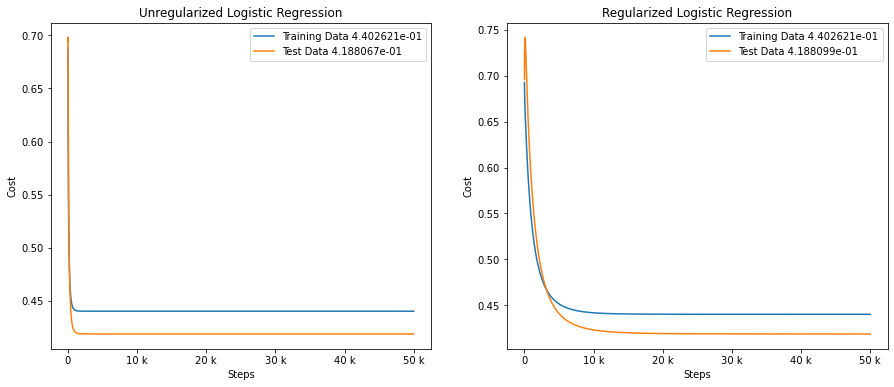

In [5]:
from matplotlib import ticker

get_x = lambda x, y, b: np.array((x, y, np.square(x), np.square(y), b))

m = training_data.shape[1]
tm = test_data.shape[1]
x = get_x(training_data[0], training_data[1], np.ones(m)).T
y = training_data[2]
tx = get_x(test_data[0], test_data[1], np.ones(tm)).T
ty = test_data[2]
n = x.shape[1]
theta = np.zeros(n)
steps = 50000
alpha = 1

theta, cost_history, test_cost_history = gradient_descent(theta, x, y, tx, ty, steps, alpha)

fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(121)
ax.set_title('Unregularized Logistic Regression')
ax.plot(np.arange(0, steps, 1), cost_history, label=f'Training Data {cost_history[-1]:e}')
ax.plot(np.arange(0, steps, 1), test_cost_history, label=f'Test Data {test_cost_history[-1]:e}')
ax.set_xlabel('Steps')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel('Cost')
ax.legend(loc='best')

x = get_x(r_training_data[0], r_training_data[1], np.ones(m)).T
tx = get_x(r_test_data[0], r_test_data[1], np.ones(tm)).T
r_theta = np.zeros(n)

r_theta, cost_history, test_cost_history = gradient_descent(r_theta, x, y, tx, ty, steps, alpha)

ax = fig.add_subplot(122)
ax.set_title('Regularized Logistic Regression')
ax.plot(np.arange(0, steps, 1), cost_history, label=f'Training Data {cost_history[-1]:e}')
ax.plot(np.arange(0, steps, 1), test_cost_history, label=f'Test Data {test_cost_history[-1]:e}')
ax.set_xlabel('Steps')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel('Cost')
ax.legend(loc='best');

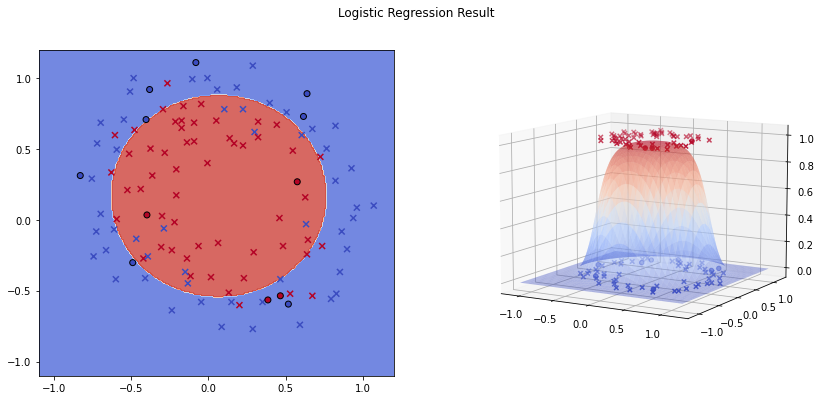

In [6]:
normalize = lambda z: sigmoid(z) > 0.5

X, Y = np.meshgrid(np.linspace(-1.1, 1.2, 256), np.linspace(-1.1, 1.2, 256))
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = get_x(X[i][j], Y[i][j], 1)
        Z[i][j] = x.dot(theta)

fig = plt.figure(figsize=(14, 6))
fig.suptitle('Logistic Regression Result')

ax = fig.add_subplot(121)
ax.contourf(X, Y, normalize(Z), cmap=cmap, alpha=0.8)
ax.scatter(training_data[0], training_data[1], c=training_data[2], cmap=cmap, marker='x')
ax.scatter(test_data[0], test_data[1], c=test_data[2], cmap=cmap, edgecolors='black')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, sigmoid(Z), alpha=0.4, cmap=cmap)
ax.scatter3D(training_data[0], training_data[1], training_data[2], c=training_data[2], cmap=cmap, marker='x')
ax.scatter3D(test_data[0], test_data[1], test_data[2], c=test_data[2], cmap=cmap)
ax.view_init(elev=10)
